In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [2]:
data = pd.read_csv('Iris.csv')
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data.drop('Species', axis=1).drop('Id', axis=1)
y = data['Species']

In [4]:
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)
x_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000
mean,5.893333,3.044762,3.828571,1.226667
std,0.876868,0.441366,1.804573,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
x_test.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,45.000000,45.000000,45.000000,45.000000
mean,5.726667,3.075556,3.595556,1.133333
std,0.696224,0.418957,1.675214,0.722999
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.200000,3.400000,4.800000,1.500000
max,7.300000,4.200000,6.300000,2.500000


In [6]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

##### True Values

In [7]:
y_test.head()

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
Name: Species, dtype: object

##### Predicted Values


In [8]:
y_pred[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

### The Decision Tree

[Text(0.4, 0.9, 'PetalLengthCm <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalLengthCm <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'PetalWidthCm <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'PetalLengthCm <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'SepalWidthCm <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1

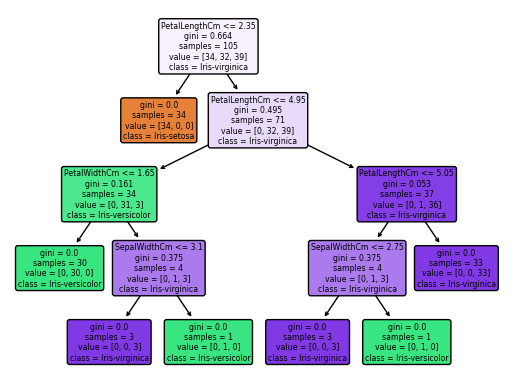

In [9]:
plot_tree(model, feature_names=features, class_names=model.classes_, filled=True, rounded=True)

#### Accuracy

In [10]:
accuracy_score(y_pred, y_test)

0.9777777777777777

#### Confusion Matrix

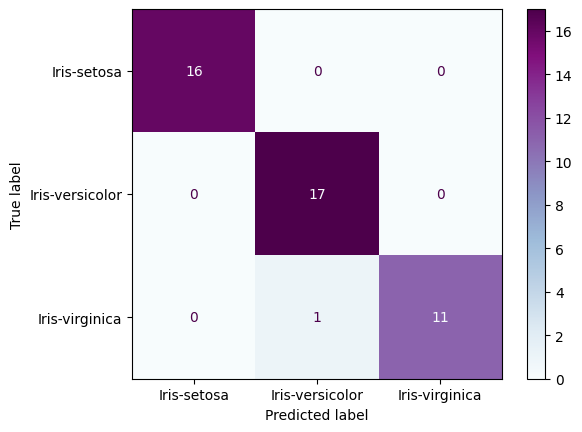

In [11]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap='BuPu')